In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#customerIDCustomer ID
#genderWhether the customer is a male or a female
#SeniorCitizenWhether the customer is a senior citizen or not (1, 0)
#PartnerWhether the customer has a partner or not (Yes, No)
#DependentsWhether the customer has dependents or not (Yes, No)
#tenureNumber of months the customer has stayed with the company
#PhoneServiceWhether the customer has a phone service or not (Yes, No)
#MultipleLinesWhether the customer has multiple lines or not (Yes, No, No phone service)
#InternetServiceCustomer’s internet service provider (DSL, Fiber optic, No)
#OnlineSecurityWhether the customer has online security or not (Yes, No, No internet service)
#OnlineBackupWhether the customer has online backup or not (Yes, No, No internet service)
#DeviceProtectionWhether the customer has device protection or not (Yes, No, No internet service)
#TechSupportWhether the customer has tech support or not (Yes, No, No internet service)
#StreamingTVWhether the customer has streaming TV or not (Yes, No, No internet service)
#StreamingMoviesWhether the customer has streaming movies or not (Yes, No, No internet service)
#ContractThe contract term of the customer (Month-to-month, One year, Two year)
#PaperlessBillingWhether the customer has paperless billing or not (Yes, No)
#PaymentMethodThe customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
#MonthlyChargesThe amount charged to the customer monthly
#TotalChargesThe total amount charged to the customer
#ChurnWhether the customer churned or not (Yes or No)


In [69]:
pd.set_option('display.max_columns', 500)

In [39]:
df = pd.read_csv("/Users/ziyadalkhonein/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
df.shape

(7043, 21)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### problem with TotalCharges is string
### Churn is string turn it to binary digit
### PaperlessBilling same as churn column
### any column with yes and no we need to change it to binary digit
### 

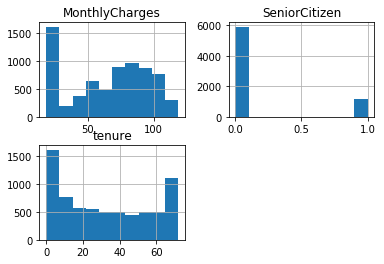

In [43]:
df.hist();

In [44]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [45]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

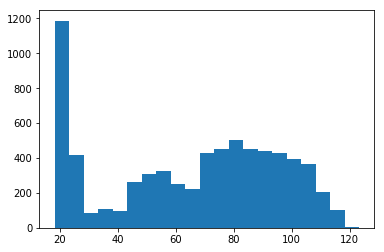

In [46]:
bins = np.arange(min(df['MonthlyCharges']),max(df['MonthlyCharges'])+5,5)
plt.hist(df['MonthlyCharges'],bins=bins);

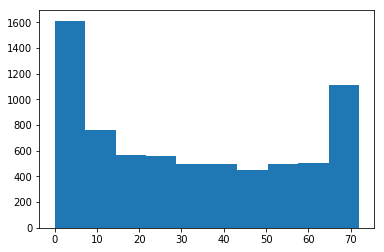

In [47]:
plt.hist(df['tenure']);

In [48]:
#sample.housing.eq('yes').mul(1)

In [49]:
df['Partner']=df.Partner.eq('Yes').mul(1)
df['Dependents']=df.Dependents.eq('Yes').mul(1)
df['PhoneService']=df.PhoneService.eq('Yes').mul(1)
df['PaperlessBilling']=df.PaperlessBilling.eq('Yes').mul(1)
df['Churn']=df.Churn.eq('Yes').mul(1)


In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### I think the best way is to remove the no internet service as they make noise and they aren't really useful as they don't add any values 

In [51]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [54]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [55]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### same with OnlineSecurity column no need for the additional information 'No internet service'

In [56]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':0})

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [58]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [59]:
df['TechSupport'] = df['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})

In [60]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [61]:
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':0})

In [62]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [63]:
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})

In [64]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [65]:
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})

In [66]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [67]:
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
